# Петров Сергей Дмитриевич, Вариант 5

In [1]:
import module_lab1 as lab1
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
N = 200
var_xi = lab1.create_xi(N)

x1_symm = lab1.calc_x(var_xi, lab1.M1, lab1.B_diag_symm)
x2_symm = lab1.calc_x(var_xi, lab1.M2, lab1.B_diag_symm)
x3_symm = lab1.calc_x(var_xi, lab1.M3, lab1.B_diag_symm)

x1_asymm = lab1.calc_x(var_xi, lab1.M1, lab1.B_diag_asymm)
x2_asymm = lab1.calc_x(var_xi, lab1.M2, lab1.B_diag_asymm)
x3_asymm = lab1.calc_x(var_xi, lab1.M3, lab1.B_diag_asymm)

x1_fliped_asymm = lab1.calc_x(var_xi, lab1.M1, lab1.diag_flip(lab1.B_diag_asymm))
x2_fliped_asymm = lab1.calc_x(var_xi, lab1.M2, lab1.diag_flip(lab1.B_diag_asymm))
x3_fliped_asymm = lab1.calc_x(var_xi, lab1.M3, lab1.diag_flip(lab1.B_diag_asymm))

In [3]:
def mse(pred, target):
    return ((pred - target)**2).mean()

def prepair_data(vec1, vec2):
    x_train = np.append(vec1, vec2, axis = 0)
    target = np.array([0]*vec1.shape[0] + [1]*vec2.shape[0])
    return x_train, target

### Задача 1
Построить линейный классификатор, максимизирующий критерий Фишера, для классов Ω0 и Ω1 двумерных нормально распределенных векторов признаков для случаев равных и неравных корреляционных матриц. Сравнить качество полученного классификатора с байесовским классификатором

In [4]:
class FisherClassifier:
    def __init__(self):
        self.m0 = 0
        self.m1 = 0
        self.sigma0 = 0
        self.sigma1 = 0

    def calc_sigma(self, b):
        return self.weights.T @ b @ self.weights

    def calc_m(self, M):
        return self.weights.T @ M + self.bias

    def fit(self, vec0, vec1):
        self.vectors = [vec0, vec1]
        m0_hat = lab1.calc_M_hat(vec0)
        b0_hat = lab1.calc_B_hat(vec0, m0_hat)

        m1_hat = lab1.calc_M_hat(vec1)
        b1_hat = lab1.calc_B_hat(vec1, m1_hat)

        delta_m = (m1_hat - m0_hat)
        inv_half_sum_b = np.linalg.inv((b0_hat + b1_hat)/2)

        self.weights = inv_half_sum_b @ delta_m

        self.sigma0 = self.calc_sigma(b0_hat)
        self.sigma1 = self.calc_sigma(b1_hat)

        self.bias = -delta_m.T @ inv_half_sum_b @ (self.sigma0 * m1_hat + self.sigma1 * m0_hat) # важно что разныйе индексы
        self.bias /=(self.sigma0 + self.sigma1)

        self.m0 = self.calc_m(m0_hat)
        self.m1 = self.calc_m(m1_hat)


    def predict(self, vec):
        return (self.weights.T @ vec + self.bias) > 0
    
    def pred_list(self, vecs):
        return np.array([self.predict(vec) for vec in vecs])

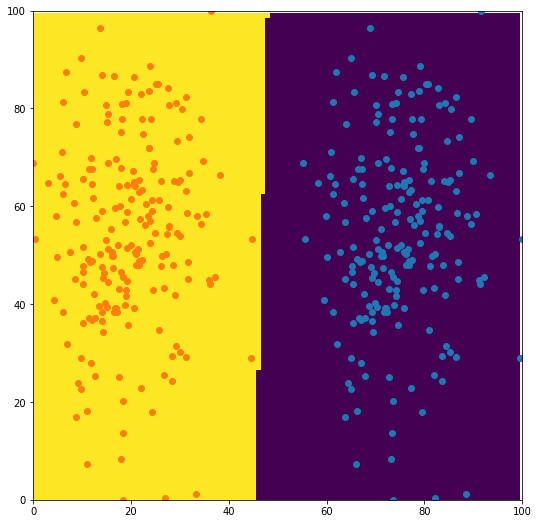

Accuracy: 1.0


In [5]:
x1 = x2_symm
x2 = x3_symm

fisher = FisherClassifier()

fisher.fit(x1, x2)

lab1.plot_classifier_field([x1, x2], fisher.predict)
plt.show()

pred = fisher.pred_list(np.append(x1, x2, axis = 0))
print(f'Accuracy: {lab1.accuracy(np.array([0]*N + [1]*N), pred)}')

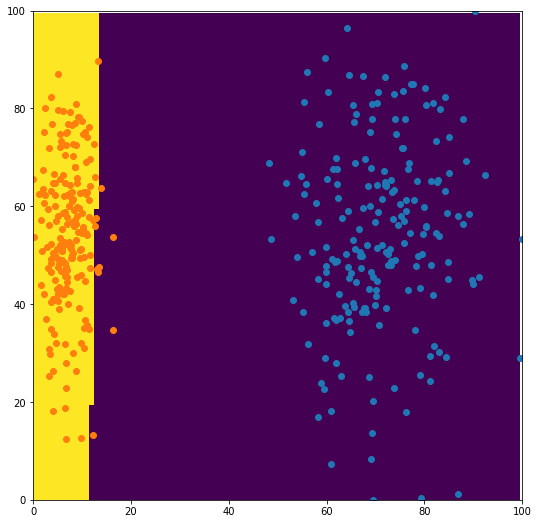

Accuracy: 0.9825


In [6]:
x1 = x2_symm
x2 = x3_asymm

fisher = FisherClassifier()

fisher.fit(x1, x2)

lab1.plot_classifier_field([x1, x2], fisher.predict)
plt.show()

pred = fisher.pred_list(np.append(x1, x2, axis = 0))
print(f'Accuracy: {lab1.accuracy(np.array([0]*N + [1]*N), pred)}')

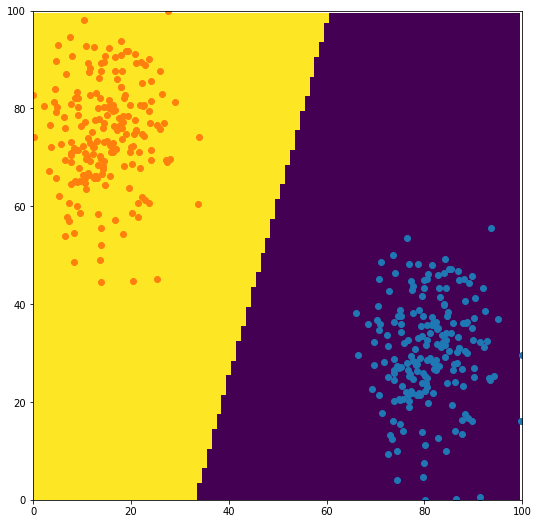

Accuracy: 1.0


In [7]:
x1 = x1_asymm
x2 = x3_asymm

fisher = FisherClassifier()

fisher.fit(x1, x2)

lab1.plot_classifier_field([x1, x2], fisher.predict)
plt.show()

pred = fisher.pred_list(np.append(x1, x2, axis = 0))
print(f'Accuracy: {lab1.accuracy(np.array([0]*N + [1]*N), pred)}')

### Задача 2
Построить линейный классификатор, минимизирующий среднеквадратичную ошибку, для классов Ω0 и Ω1 двумерных нормально распределенных векторов признаков для случаев равных и неравных корреляционных матриц. Сравнить качество полученного классификатора с классификатором Байеса и классификатором Фишера. 

In [8]:
class LSMClassifier:
    def __init__(self):
        self.W = None
        self.b = None
    
    def fit(self, X_train, y_train):
        x_expanded = np.append(X_train, np.ones((X_train.shape[0], 1)), axis = 1)
        temp = np.linalg.inv(x_expanded.T @ x_expanded) @ x_expanded.T @ y_train
        self.W = temp[:-1]
        self.b = temp[-1]
        
    def predict(self, X):
        return X @ self.W + self.b
    
    def predict_class(self, X):
        return self.predict(X) > 0.5

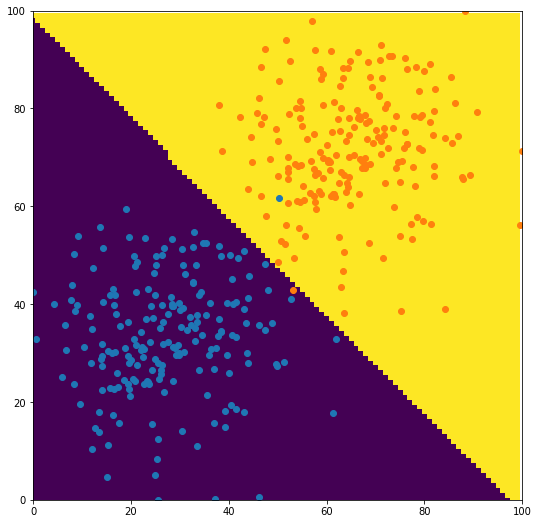

0.995

In [9]:
x1 = x1_symm
x2 = x2_symm

x_train, target = prepair_data(x1, x2)

lsm = LSMClassifier()

lsm.fit(x_train, target)

lab1.plot_classifier_field([x1, x2], lsm.predict_class)
plt.show()

lab1.accuracy(target, lsm.predict_class(x_train))

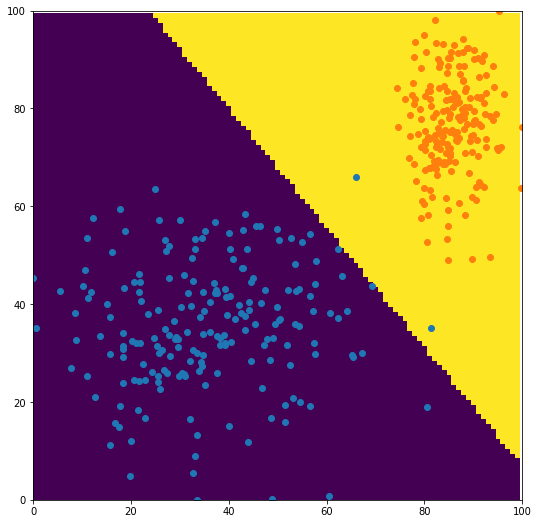

0.995

In [10]:
x1 = x1_symm
x2 = x2_asymm

x_train, target = prepair_data(x1, x2)

lsm = LSMClassifier()

lsm.fit(x_train, target)

lab1.plot_classifier_field([x1, x2], lsm.predict_class)
plt.show()

lab1.accuracy(target, lsm.predict_class(x_train))

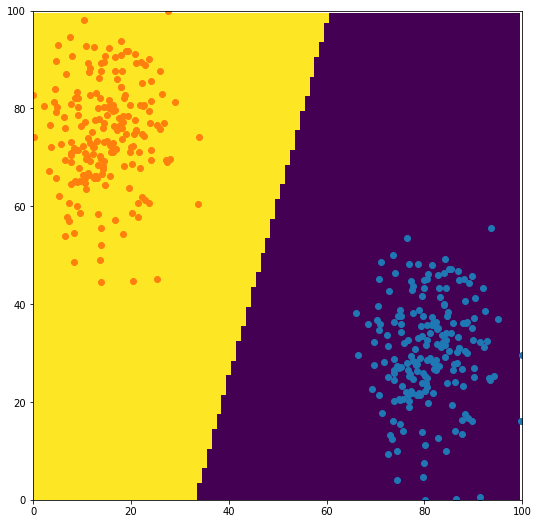

1.0

In [11]:
x1 = x1_asymm
x2 = x3_asymm

x_train, target = prepair_data(x1, x2)

lsm = LSMClassifier()

lsm.fit(x_train, target)

lab1.plot_classifier_field([x1, x2], lsm.predict_class)
plt.show()

lab1.accuracy(target, lsm.predict_class(x_train))

### Задача 3
Построить линейный классификатор, основанный на процедуре Роббинса-Монро, для классов Ω0 и Ω1 двумерных нормально распределенных векторов признаков для случаев равных и неравных корреляционных матриц. Исследовать зависимость скорости сходимости итерационного процесса и качества классификации от выбора начальных условий и выбора последовательности корректирующих коэффициентов. Сравнить качество полученного классификатора с байесовским классификатором. 

In [12]:


class RobMonClassifier:
    def __init__(self, max_steps=2000, alpha=1e-10):
        self.nsteps = max_steps
        self.alpha = alpha
        
        self.W = None
        
    def __grad(self,x,y):
        return x.T @( (x @ self.W) - y)
        
    def fit(self, X_train, y_train):
        lamb = 0.1

        # Добавляется единичная фича (замена обучению байеса)
        x_expanded = np.append(X_train, np.ones((X_train.shape[0], 1)), axis = 1)
        self.W = np.ones(x_expanded.shape[1])
        
        prev_m = mse(self.predict(X_train), y_train)
        for i in range(self.nsteps):
            self.W -= lamb*self.__grad(x_expanded, y_train)
            next_m = mse(self.predict(X_train), y_train)
            if(next_m > prev_m):
                lamb /= 2
            
            if(abs(next_m - prev_m) < self.alpha):
                break
            prev_m  = next_m 
            
        
    def predict(self, X):
        if(len(X.shape) > 1):
            X = np.append(X, np.ones((X.shape[0], 1)), axis = 1)
        else:
            X = np.append(X, 1)

        return X @ self.W
    
    def predict_class(self, X):
        return self.predict(X) > 0.5
    

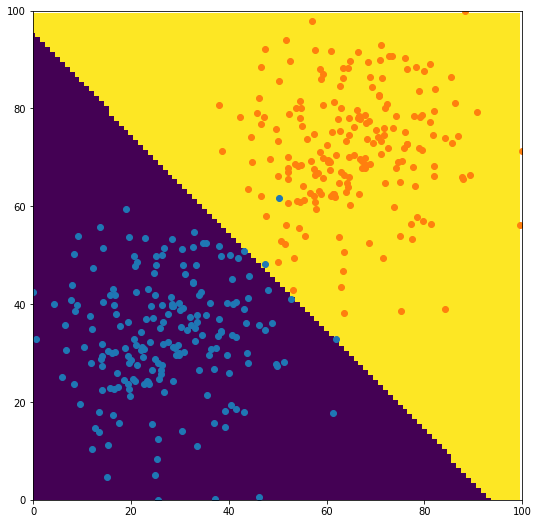

0.995

In [13]:
x1 = x1_symm
x2 = x2_symm

x_train, target = prepair_data(x1, x2)

rob_mon_class = RobMonClassifier(alpha=1e-2)

rob_mon_class.fit(x_train, target)

lab1.plot_classifier_field([x1, x2], rob_mon_class.predict_class)
plt.show()

lab1.accuracy(target, rob_mon_class.predict_class(x_train))

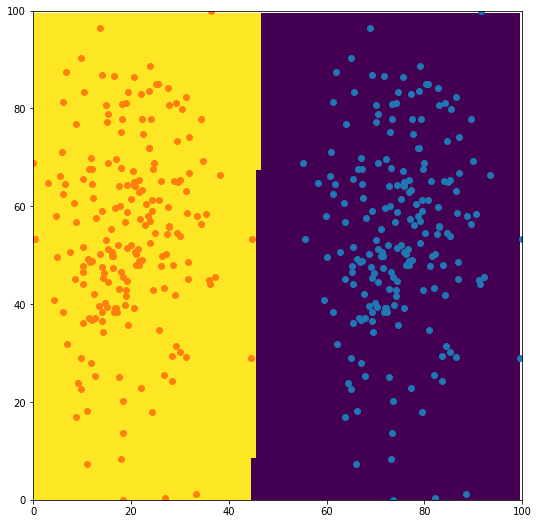

1.0

In [14]:
x1 = x2_symm
x2 = x3_symm

x_train, target = prepair_data(x1, x2)

rob_mon_class = RobMonClassifier(alpha=1e-2)

rob_mon_class.fit(x_train, target)

lab1.plot_classifier_field([x1, x2], rob_mon_class.predict_class)
plt.show()

lab1.accuracy(target, rob_mon_class.predict_class(x_train))

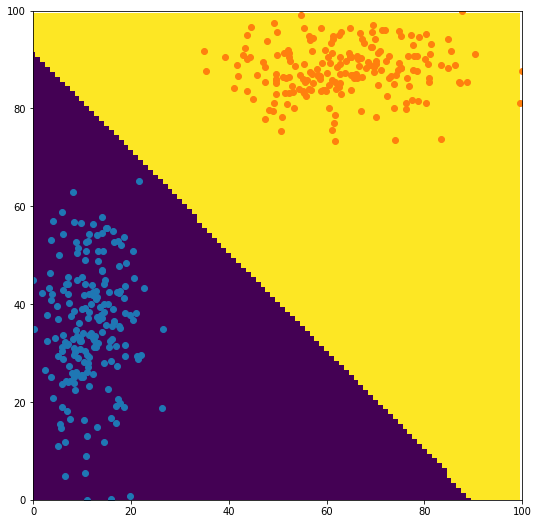

1.0

In [15]:
x1 = x1_asymm
x2 = x2_fliped_asymm

x_train, target = prepair_data(x1, x2)

rob_mon_class = RobMonClassifier(alpha=1e-2)

rob_mon_class.fit(x_train, target)

lab1.plot_classifier_field([x1, x2], rob_mon_class.predict_class)
plt.show()

lab1.accuracy(target, rob_mon_class.predict_class(x_train))